# Customer Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../data/Global_Superstore2.csv',encoding='latin-1')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [4]:
df.drop(columns=["Row ID"],inplace=True)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [5]:
df[['Order Day','Order Month','Order Year']]=df['Order Date'].str.split('-',expand=True)
df[['Ship Day','Ship Month','Ship Year']]=df['Ship Date'].str.split('-',expand=True)
df['Order Date']=pd.to_datetime(df['Order Day']+'-'+df['Order Month']+'-'+df['Order Year'],dayfirst=True)
df['Ship Date']=pd.to_datetime(df['Ship Day']+'-'+df['Ship Month']+'-'+df['Ship Year'],dayfirst=True)
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Discount,Profit,Shipping Cost,Order Priority,Order Day,Order Month,Order Year,Ship Day,Ship Month,Ship Year
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,0.0,762.1845,933.57,Critical,31,07,2012,31,07,2012
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,0.1,-288.7650,923.63,Critical,05,02,2013,07,02,2013


In [6]:
df.drop(columns=['Order Day','Order Month','Order Year','Ship Day','Ship Month','Ship Year'],inplace=True)

In [7]:
df.isna().sum()

Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [8]:
df.drop(columns=['Postal Code'],inplace=True)

In [9]:
df.nunique()

Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [10]:
df['Ship Mode']=df['Ship Mode'].astype('category')
df['Segment']=df['Segment'].astype('category')
df['Country']=df['Country'].astype('category')
df['Market']=df['Market'].astype('category')
df['Region']=df['Region'].astype('category')
df['Category']=df['Category'].astype('category')
df['Sub-Category']=df['Sub-Category'].astype('category')
df['Order Priority']=df['Order Priority'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  category      
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  category      
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  category      
 10  Market          51290 non-null  category      
 11  Region          51290 non-null  category      
 12  Product ID      51290 non-null  object        
 13  Category        51290 non-null  category      
 14  Sub-Category    51290 non-null  category      
 15  Pr

In [12]:
def clean_spaces(df):
    for i in df.columns:
        if df[i].dtype in ['object','category']:
            df[i]=df[i].str.strip()
        return df

In [13]:
df=clean_spaces(df)

In [14]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [15]:
df['Order Year']=df['Order Date'].dt.year


In [16]:
print(f"Number of unique Customers in 2011 : {df[df['Order Year']==2011]['Customer ID'].nunique()}")
print(f"Number of unique Customers in 2012 : {df[df['Order Year']==2012]['Customer ID'].nunique()}")
print(f"Number of unique Customers in 2013 : {df[df['Order Year']==2013]['Customer ID'].nunique()}")
print(f"Number of unique Customers in 2014 : {df[df['Order Year']==2014]['Customer ID'].nunique()}")

Number of unique Customers in 2011 : 1309
Number of unique Customers in 2012 : 1373
Number of unique Customers in 2013 : 1458
Number of unique Customers in 2014 : 1511


In [17]:
print(f"No. of Orders in 2011 : {int(df[df['Order Year']==2011]['Order ID'].nunique())}")
print(f"No. of Orders in 2012 : {int(df[df['Order Year']==2012]['Order ID'].nunique())}")
print(f"No. of Orders in 2013 : {int(df[df['Order Year']==2013]['Order ID'].nunique())}")
print(f"No. of Orders in 2014 : {int(df[df['Order Year']==2014]['Order ID'].nunique())}")

No. of Orders in 2011 : 4440
No. of Orders in 2012 : 5343
No. of Orders in 2013 : 6721
No. of Orders in 2014 : 8531


In [18]:
print(f"Average no. of Orders per Customer in 2011 : {int(df[df['Order Year']==2011]['Order ID'].nunique()/df[df['Order Year']==2011]['Customer ID'].nunique())}")
print(f"Average no. of Orders per Customer in 2012 : {int(df[df['Order Year']==2012]['Order ID'].nunique()/df[df['Order Year']==2012]['Customer ID'].nunique())}")
print(f"Average no. of Orders per Customer in 2013 : {int(df[df['Order Year']==2013]['Order ID'].nunique()/df[df['Order Year']==2013]['Customer ID'].nunique())}")
print(f"Average no. of Orders per Customer in 2014 : {int(df[df['Order Year']==2014]['Order ID'].nunique()/df[df['Order Year']==2014]['Customer ID'].nunique())}")

Average no. of Orders per Customer in 2011 : 3
Average no. of Orders per Customer in 2012 : 3
Average no. of Orders per Customer in 2013 : 4
Average no. of Orders per Customer in 2014 : 5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  category      
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  category      
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  category      
 10  Market          51290 non-null  category      
 11  Region          51290 non-null  category      
 12  Product ID      51290 non-null  object        
 13  Category        51290 non-null  category      
 14  Sub-Category    51290 non-null  category      
 15  Pr

### Question 1: Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer

In [20]:
purchase_frequency = (
    df.groupby(['Customer ID', 'Order Year'])[['Order ID']]
      .nunique()
      .reset_index()
)

In [21]:
purchase_frequency.rename(
    columns={'Order ID': 'Purchase Frequency'},
    inplace=True
)

In [22]:
purchase_frequency.head()

,Customer ID,Order Year,Purchase Frequency
0,AA-10315,2011,4
1,AA-10315,2012,2
2,AA-10315,2013,6
3,AA-10315,2014,7
4,AA-10375,2011,3


In [23]:
def customer_profile(freq):
    if freq == 1:
        return 'One-time Buyer'
    elif 2 <= freq <= 5:
        return 'Occasional Buyer'
    elif 6 <= freq <= 10:
        return 'Regular Buyer'
    else:
        return 'Loyal Customer'

In [24]:
purchase_frequency["Customer Profile"]=purchase_frequency['Purchase Frequency'].apply(customer_profile)

C:\Users\manth\AppData\Local\Temp\ipykernel_13676\3965124602.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=purchase_frequency, x='Customer Profile', palette='viridis')


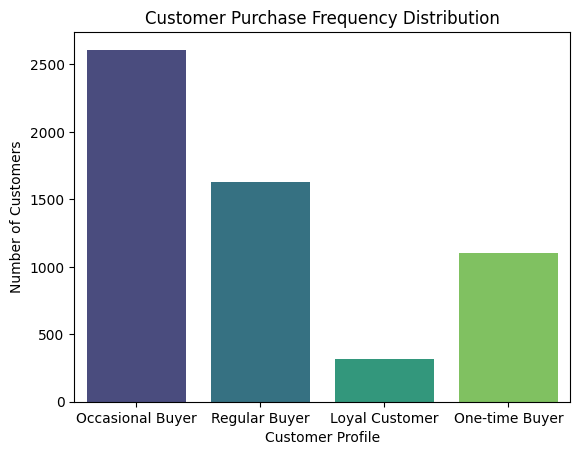

In [25]:
sns.countplot(data=purchase_frequency, x='Customer Profile', palette='viridis')
plt.xlabel('Customer Profile')
plt.ylabel('Number of Customers')
plt.title('Customer Purchase Frequency Distribution')
plt.show()

#### Answer : Occasional Buyers are more in numbers then the other profiles and the number of loyal customers is the least.

### Question 2 : Do the high frequent customers are contributing more revenue

In [26]:
df['Customer Purchase Frequency']=purchase_frequency['Customer Profile']

In [27]:
revenue_contribution=df.groupby('Customer Purchase Frequency')['Sales'].sum().astype(int)
revenue_contribution=revenue_contribution.reset_index()
revenue_contribution.head()

,Customer Purchase Frequency,Sales
0,Loyal Customer,333057
1,Occasional Buyer,3025918
2,One-time Buyer,1194245
3,Regular Buyer,1806040


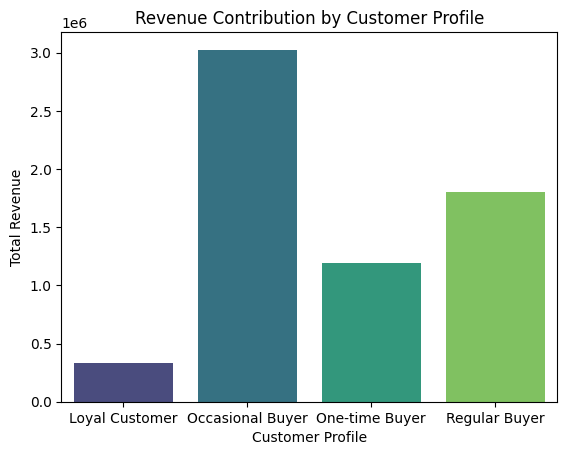

In [28]:
sns.barplot(data=revenue_contribution, x='Customer Purchase Frequency', y='Sales',hue='Customer Purchase Frequency', palette='viridis')
plt.xlabel('Customer Profile')
plt.ylabel('Total Revenue')
plt.title('Revenue Contribution by Customer Profile')
plt.show()

#### No, the occasional buyers are generally more contributing to the revenue, the high contributing one's are the least contributing to the revenue.

## Question 4 : Are they also profitable - what is the profit margin across the buckets

In [29]:
profit_contribution=df.groupby('Customer Purchase Frequency')['Profit'].sum().astype(int)
profit_contribution=profit_contribution.reset_index()
profit_contribution.head()

,Customer Purchase Frequency,Profit
0,Loyal Customer,28728
1,Occasional Buyer,428089
2,One-time Buyer,174867
3,Regular Buyer,269762


Text(0.5, 1.0, 'Profit Contribution by Customers')

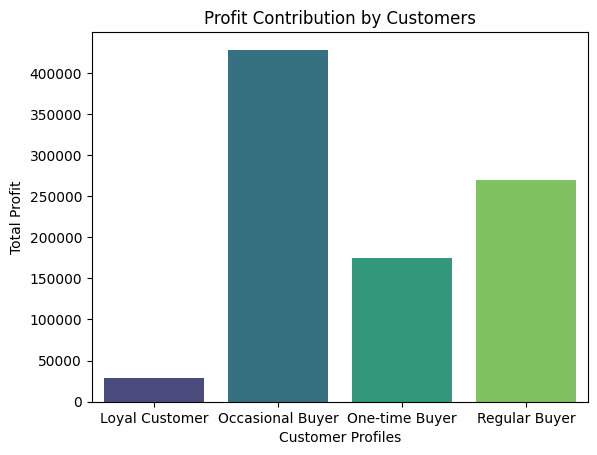

In [30]:
sns.barplot(data=profit_contribution, x='Customer Purchase Frequency', y='Profit',hue='Customer Purchase Frequency', palette='viridis')
plt.xlabel('Customer Profiles')
plt.ylabel('Total Profit')
plt.title('Profit Contribution by Customers')

#### Answer : No, the highly frequent customers are also contributing least to the profit whereas the Occasional buyers generally provide high profits compared to the loyal ones.

## Question 4 : Which customer segment is most profitable in each year.

In [31]:
profit_contribution=(df.groupby(['Customer Purchase Frequency','Order Year'])['Profit'].sum().astype(int))
profit_contribution=profit_contribution.reset_index()

In [32]:
profit_contribution.rename({"Customer Purchase Frequency":"Customer Profile","Order Year":"Year"},inplace=True)
profit_contribution.head()

,Customer Purchase Frequency,Order Year,Profit
0,Loyal Customer,2011,12648
1,Loyal Customer,2012,5292
2,Loyal Customer,2013,8859
3,Loyal Customer,2014,1928
4,Occasional Buyer,2011,66273


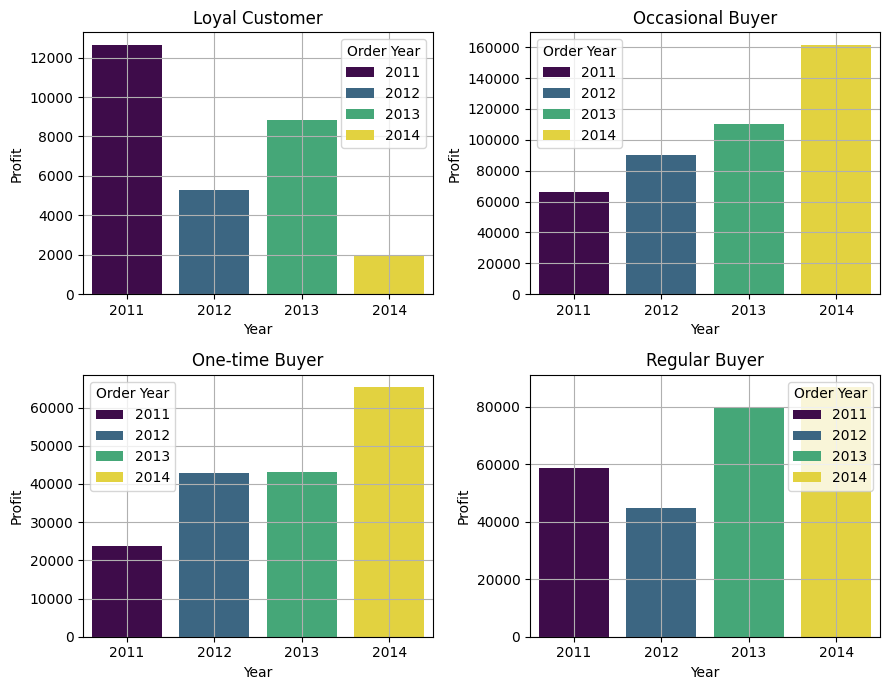

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(9, 7))
axes = axes.flatten()

profiles = profit_contribution['Customer Purchase Frequency'].unique()

for ax, profile in zip(axes, profiles):
    data = profit_contribution[profit_contribution['Customer Purchase Frequency'] == profile]

    sns.barplot(data=data, x='Order Year', y='Profit',hue='Order Year', palette='viridis', ax=ax)
    ax.set_title(profile)
    ax.get_xticklabels()
    ax.set_xlabel('Year')
    ax.set_ylabel('Profit')
    ax.grid(True)
    

plt.tight_layout()
plt.show()


#### Answer : The Occasional Buyers are generally more profitable then the loyal customers, and the data shows the profit generated by the cccasional buyers is Increasing ,loyal customers is decreasing and the regular buyers remain stable with respect to time. 

# Product Analysis

## Question 1 : Which Country has the top sales?

In [37]:
country_group=df.groupby("Country")[["Sales","Profit"]].sum().reset_index()
country_group.sort_values(by="Sales",ascending=False,inplace=True)
country_group.head()

C:\Users\manth\AppData\Local\Temp\ipykernel_13676\1414773522.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_group=df.groupby("Country")[["Sales","Profit"]].sum().reset_index()


,Country,Sales,Profit
139,United States,2.297201e+06,286397.0217
6,Australia,9.252359e+05,103907.4330
44,France,8.589311e+05,109029.0030
26,China,7.005620e+05,150683.0850
47,Germany,6.288400e+05,107322.8205


In [38]:
country_group['Sales']=country_group['Sales'].astype(int)
country_group['Profit']=country_group['Profit'].astype(int)
country_group.head()

,Country,Sales,Profit
139,United States,2297200,286397
6,Australia,925235,103907
44,France,858931,109029
26,China,700562,150683
47,Germany,628840,107322


In [42]:
top10_sales=country_group.head(10)
top10_sales

,Country,Sales,Profit
139,United States,2297200,286397
6,Australia,925235,103907
44,France,858931,109029
26,China,700562,150683
47,Germany,628840,107322
81,Mexico,622590,102818
57,India,589650,129071
138,United Kingdom,528576,111900
58,Indonesia,404887,15608
17,Brazil,361106,30090


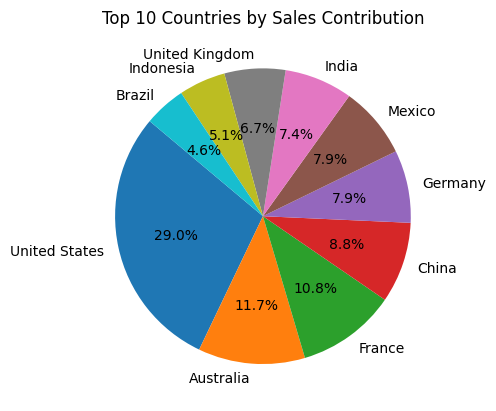

In [44]:
plt.pie(top10_sales['Sales'],labels=top10_sales['Country'],autopct='%1.1f%%',startangle=140)
plt.title('Top 10 Countries by Sales Contribution')
plt.show()

#### Answer : From the above figure we can observe that US have the top sales followed by Australia, France, China and Others. 

## Question 2 : Which are the top 5 profit-making product types on a yearly basis

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Order ID                     51290 non-null  object        
 1   Order Date                   51290 non-null  datetime64[ns]
 2   Ship Date                    51290 non-null  datetime64[ns]
 3   Ship Mode                    51290 non-null  category      
 4   Customer ID                  51290 non-null  object        
 5   Customer Name                51290 non-null  object        
 6   Segment                      51290 non-null  category      
 7   City                         51290 non-null  object        
 8   State                        51290 non-null  object        
 9   Country                      51290 non-null  category      
 10  Market                       51290 non-null  category      
 11  Region                       51290 non-nu

In [49]:
product_type_profit=df.groupby(['Sub-Category','Order Year'])['Profit'].sum().reset_index()
product_type_profit.rename(columns={'Order Year':'Year'},inplace=True)
product_type_profit.head()

C:\Users\manth\AppData\Local\Temp\ipykernel_13676\878256568.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_type_profit=df.groupby(['Sub-Category','Order Year'])['Profit'].sum().reset_index()


,Sub-Category,Year,Profit
0,Accessories,2011,15719.8606
1,Accessories,2012,33507.1002
2,Accessories,2013,38805.4168
3,Accessories,2014,41593.9286
4,Appliances,2011,22838.4413


In [54]:
# 2011 Top 5 Profitable Product Types
data1=product_type_profit[product_type_profit['Year']==2011][['Sub-Category','Profit']].nlargest(5, 'Profit')
data1.head()

,Sub-Category,Profit
52,Phones,53927.48950
24,Copiers,30375.09344
20,Chairs,29943.15710
16,Bookcases,27518.85750
4,Appliances,22838.44130


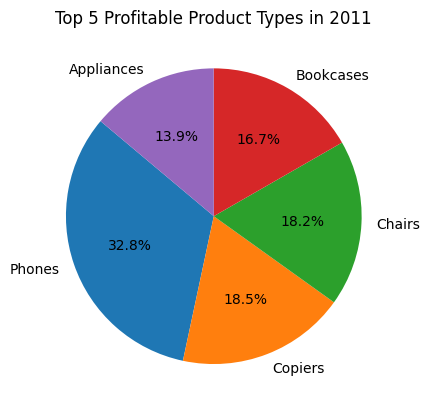

In [57]:
plt.pie(data1['Profit'],labels=data1['Sub-Category'],autopct='%1.1f%%',startangle=140)
plt.title('Top 5 Profitable Product Types in 2011')
plt.show()

In [58]:
# 2012 Top 5 Profitable Product Types
data2=product_type_profit[product_type_profit['Year']==2012][['Sub-Category','Profit']].nlargest(5, 'Profit')
data2.head()

,Sub-Category,Profit
25,Copiers,51843.2276
53,Phones,45223.0498
1,Accessories,33507.1002
21,Chairs,28755.3467
17,Bookcases,28137.2671


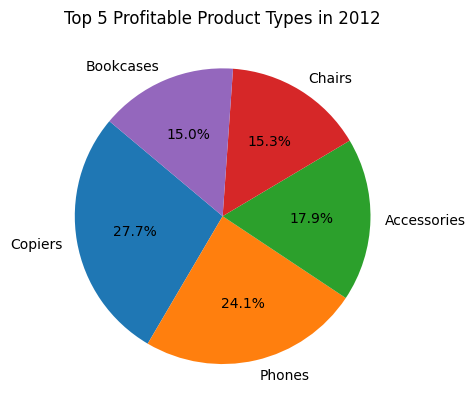

In [59]:
plt.pie(data2['Profit'],labels=data2['Sub-Category'],autopct='%1.1f%%',startangle=140)
plt.title('Top 5 Profitable Product Types in 2012')
plt.show()

In [61]:
# 2013 Top 5 Profitable Product Types
data3=product_type_profit[product_type_profit['Year']==2013][['Sub-Category','Profit']].nlargest(5, 'Profit')
data3.head()

,Sub-Category,Profit
26,Copiers,72300.69118
54,Phones,46908.82520
18,Bookcases,43049.24440
6,Appliances,41485.51600
22,Chairs,40449.49210


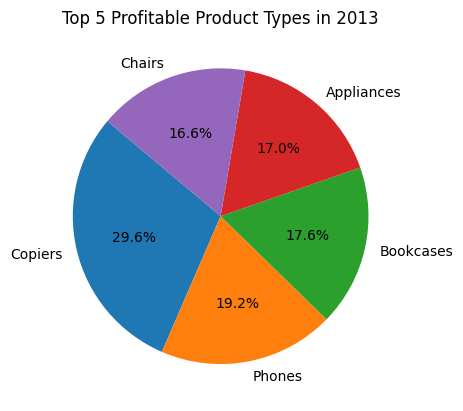

In [62]:
plt.pie(data3['Profit'],labels=data3['Sub-Category'],autopct='%1.1f%%',startangle=140)
plt.title('Top 5 Profitable Product Types in 2013')
plt.show()

In [63]:
# 2013 Top 5 Profitable Product Types
data4=product_type_profit[product_type_profit['Year']==2014][['Sub-Category','Profit']].nlargest(5, 'Profit')
data4.head()

,Sub-Category,Profit
27,Copiers,104048.53596
55,Phones,70657.64130
19,Bookcases,63219.05050
7,Appliances,53040.50050
3,Accessories,41593.92860


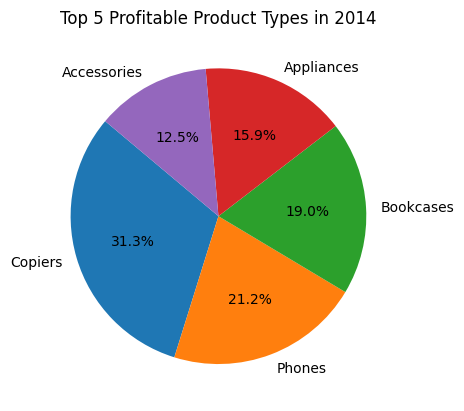

In [64]:
plt.pie(data4['Profit'],labels=data4['Sub-Category'],autopct='%1.1f%%',startangle=140)
plt.title('Top 5 Profitable Product Types in 2014')
plt.show()

## Question 4 : What is the average delivery time across the countries


In [69]:
df["Delivery Time"]=(df['Ship Date']-df['Order Date'])
df["Delivery Time"]=df["Delivery Time"].dt.days
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Customer Purchase Frequency,Delivery Time
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,Occasional Buyer,0
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,Occasional Buyer,2
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,Regular Buyer,1
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,Regular Buyer,2
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,Occasional Buyer,1


In [70]:
df['Delivery Time'].unique()

array([0, 2, 1, 3, 4, 7, 6, 5])

In [83]:
for i in top10_sales["Country"].index:
    top10_sales['Avg Delivery Time'][i] = df[df["Country"] == df["Country"][i]]["Delivery Time"].mean().astype(int)

C:\Users\manth\AppData\Local\Temp\ipykernel_13676\3226914263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_sales['Avg Delivery Time'][i] = df[df["Country"] == df["Country"][i]]["Delivery Time"].mean().astype(int)


In [84]:
top10_sales

,Country,Sales,Profit,Avg Delivery Time
139,United States,2297200,286397,3.0
6,Australia,925235,103907,3.0
44,France,858931,109029,4.0
26,China,700562,150683,3.0
47,Germany,628840,107322,3.0
81,Mexico,622590,102818,3.0
57,India,589650,129071,3.0
138,United Kingdom,528576,111900,3.0
58,Indonesia,404887,15608,3.0
17,Brazil,361106,30090,4.0


C:\Users\manth\AppData\Local\Temp\ipykernel_13676\2269684363.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


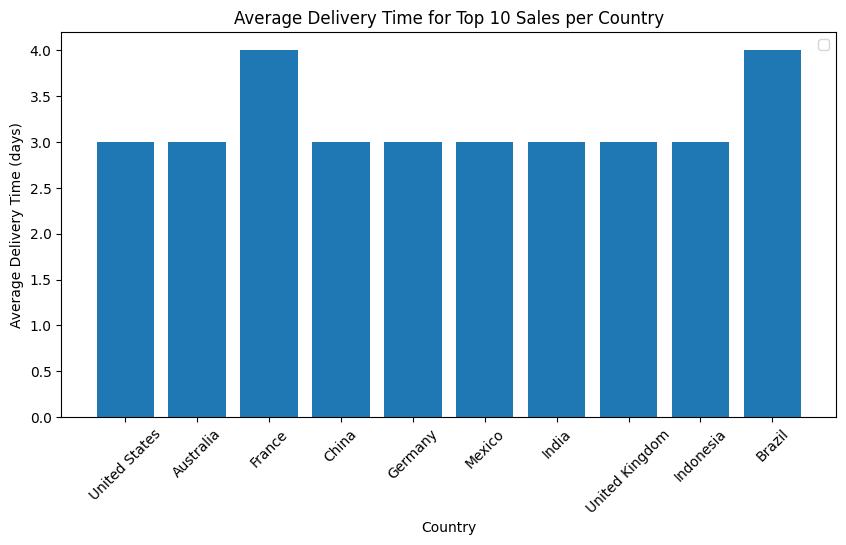

In [91]:
plt.figure(figsize=(10, 5))

plt.bar(top10_sales['Country'],top10_sales['Avg Delivery Time'])
plt.xlabel('Country')
plt.ylabel('Average Delivery Time (days)')
plt.title('Average Delivery Time for Top 10 Sales per Country')
plt.xticks(rotation=45)
plt.legend()
plt.show()


#### Answer : From the figure above we are able to observe that the countries France and Brazil have long delivery time compred to others as all other countries have similar average delivery time.